<a href="https://colab.research.google.com/github/dmehraj01/Project/blob/main/airline_passenger_satisfactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
import eli5
from eli5.sklearn import PermutationImportance
import statsmodels.api as sm
import time
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics

### Read the datasets

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### Train Dataset

In [ ]:
# Get Number of records and columns
print(train.shape)
train.head(10)

(103904, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [ ]:
# Drop unnecessary columns
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('id', axis=1)
# Check size of the data set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

### Test Dataset

In [ ]:
# Get Number of records and columns
print(test.shape)
test.head(10)

(25976, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [ ]:
# Drop unnecessary columns
test = test.drop('Unnamed: 0', axis=1)
test = test.drop('id', axis=1)
# Check size of the data set
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

### Replace spaces in the column names with underscore - Train and Test

In [ ]:
train.columns = [c.replace(' ', '_') for c in train.columns]
test.columns = [c.replace(' ', '_') for c in test.columns]

### Replacing label column "satisfaction" values with 0 and 1 *(neutral or dissatisfied = 0 and satisfied = 1)* - Train and Test

In [ ]:
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

### Check for the nature of dataset - balanced or imbalanced

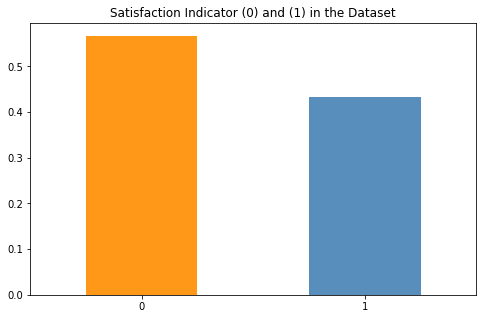

In [ ]:
fig = plt.figure(figsize = (8,5))
train.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

The above plot shows a distribution of around 55:45 between neutral/dissatisfied passengers and satisfied passengers respectively. 
So the data is quite balanced and it does not require any special resampling methods to be implemented.

### Handling the missing data

In [ ]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Arrival_Delay_in_Minutes,310,0.002984
Gender,0,0.000000
Seat_comfort,0,0.000000
Departure_Delay_in_Minutes,0,0.000000
Cleanliness,0,0.000000


In [ ]:
# Imputing missing value with mean - Train and Test
train['Arrival_Delay_in_Minutes'] = train['Arrival_Delay_in_Minutes'].fillna(train['Arrival_Delay_in_Minutes'].mean())
test['Arrival_Delay_in_Minutes'] = test['Arrival_Delay_in_Minutes'].fillna(test['Arrival_Delay_in_Minutes'].mean())

In [ ]:
# Check the list of categorical variables
train.select_dtypes(include=['object']).columns

Index(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class'], dtype='object')

In [ ]:
# Replace NaN with mode for categorical variables - Train and Test

train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Customer_Type'] = train['Customer_Type'].fillna(train['Customer_Type'].mode()[0])
train['Type_of_Travel'] = train['Type_of_Travel'].fillna(train['Type_of_Travel'].mode()[0])
train['Class'] = train['Class'].fillna(train['Class'].mode()[0])

test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Customer_Type'] = test['Customer_Type'].fillna(test['Customer_Type'].mode()[0])
test['Type_of_Travel'] = test['Type_of_Travel'].fillna(test['Type_of_Travel'].mode()[0])
test['Class'] = test['Class'].fillna(test['Class'].mode()[0])

### Exploratory Data Analysis

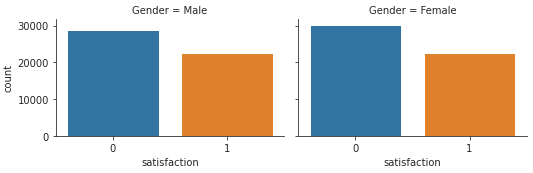

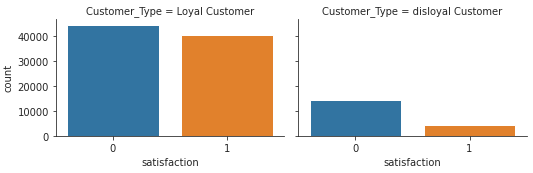

In [ ]:
# Gender and Customer type
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.5)  
    g = sns.catplot("satisfaction", col="Customer_Type", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.5)

**Gender:** <br/> 
It is observed that gender distribution of neutral/dissatisfied and satisfied customers are similar. For both male and female passengers, number of neutral/dissatisfied customers are on the higher when compared to number of satisfied customers.

**Customer Type:** <br/>
Even among loyal passengers which are high in number, the ratio of satisfied and neutral/dissatisfied ones are almost close to 49:51.

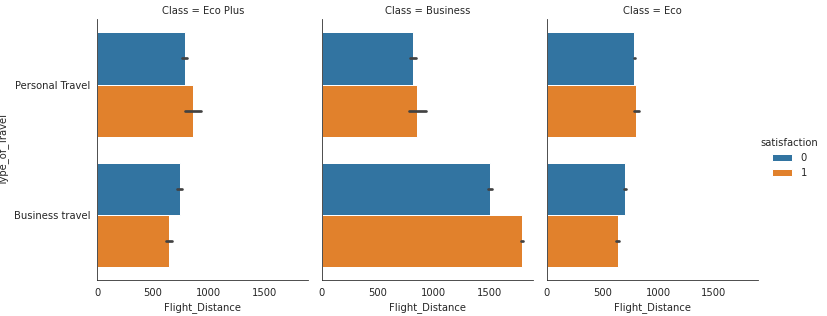

In [ ]:
# Type_of_Travel and Flight_Distance by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Flight_Distance", y="Type_of_Travel", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=.8)

**Type of Travel and Flight Distance grouped by Class:** <br/> 
For business travel in business class category, the number of satisfied passengers are quite on the higher for longer flight distance. For other combinations, almost equal distribution of satisfied and neutral/dissatisfied passengers is present.

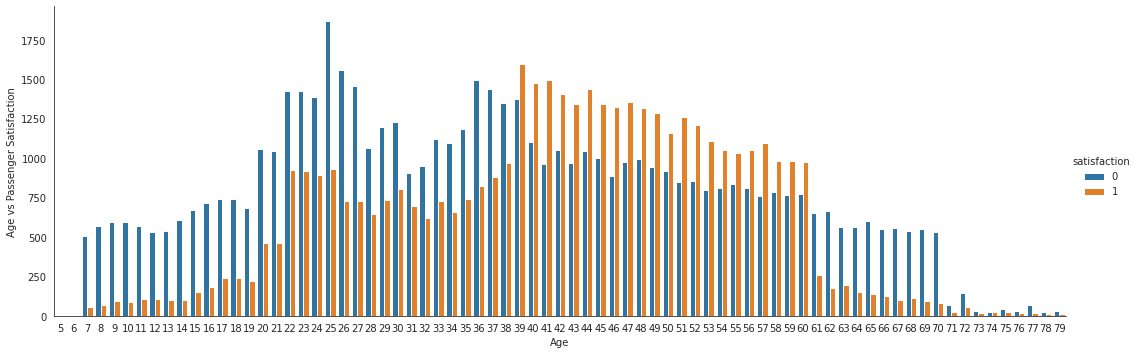

In [ ]:
# Age
with sns.axes_style('white'):
    g = sns.catplot("Age", data=train, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

**Age:** <br/> 
From age 7-to-38 and from age 61-to-79, the number of neutral/dissatisfied passengers is very high compared to satisfied passengers. On the other hand, in age group 39-60, the number of satisfied passengers is higher compared to neutral/dissatisfied passengers.

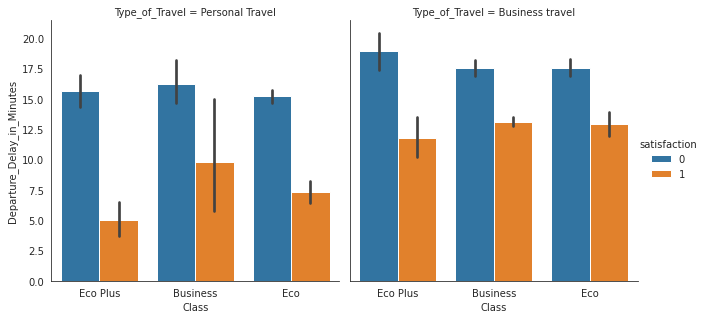

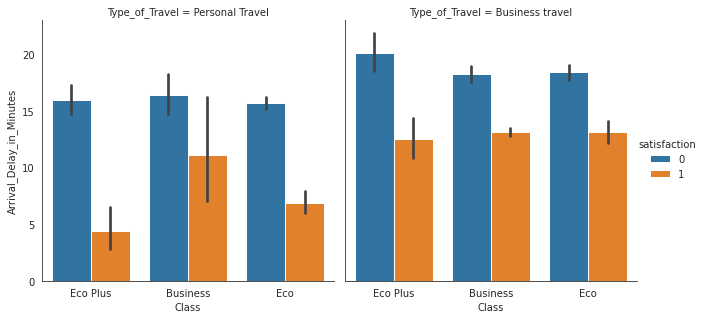

In [ ]:
# Departure_Delay and Arrival Delay by Type_of_Travel
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=1.0)
    g = sns.catplot(x="Class", y="Arrival_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=1.0)

**Departure Delay, Arrival Delay grouped by Type of Travel:** <br/>
For personal type of travel (specially for classes Eco Plus and Eco), the number of neutral/dissatisfied passengers are really high when arrival delay is high which is quite obvious. By minute comparison, all combinations have higher number of neutral/dissatisfied passengers compared to the number of satisfied passengers.

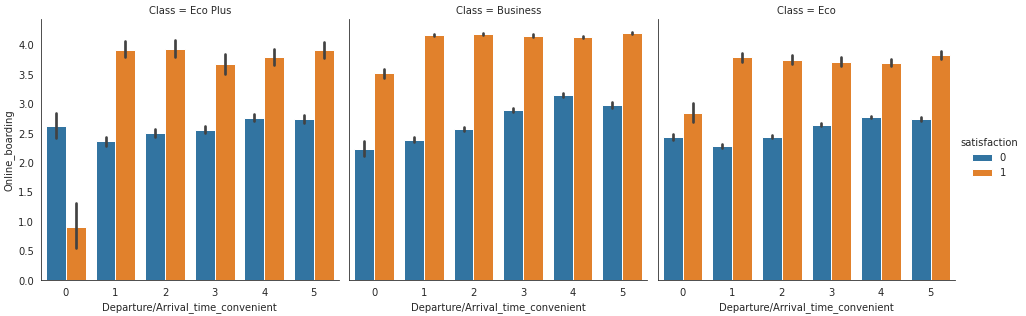

In [ ]:
# Online_boarding and Departure/Arrival_time_convenient by class
with sns.axes_style('white'):
    g = sns.catplot(x="Departure/Arrival_time_convenient", y="Online_boarding", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=1.0)

**Online Boarding, Departure/Arrival Time Convenience grouped by Class:** <br/> 
For Eco Plus class, very inconvenient Departure/Arrival time i.e., Departure/Arrival_time_convenient = 0 has high number of neutral/dissatisfied passengers, even when online boarding is on positive side. For other combinations, the number of satisfied passengers are higher compared to number of neutral/dissatisfied passengers.

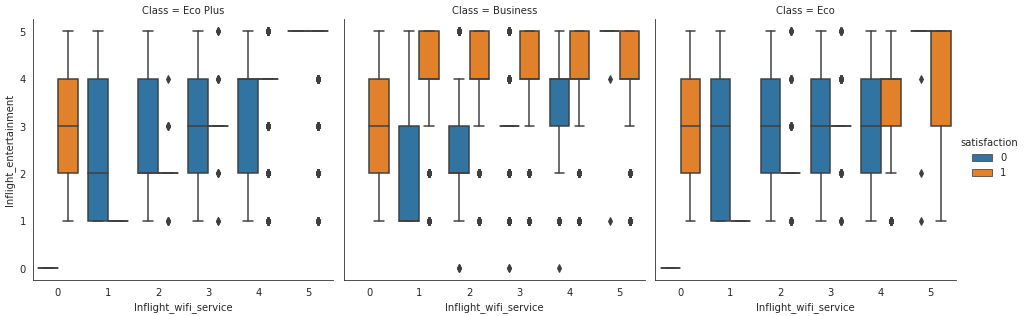

In [ ]:
# Inflight_wifi_service and Inflight_entertainment by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Inflight_wifi_service", y="Inflight_entertainment", hue="satisfaction", col="Class", data=train, kind="box", height=4.5, aspect=1.0)

**Inflight Entertainment, Inflight wi-fi Service grouped by Class:** <br/>
Eco Plus passengers are mostly satisfied without inflight wi-fi service (rating 0) and with moderate level of in-flight entertainment (rating 2 - 4). For Business class passengers, only highest level of in-flight entertainment (rating 5) can bring satisfaction in them. For Eco passengers, high level of in-flight entertainment (rating 3 - 5) and very high wi-fi service availability (rating 5) can make them satisfied.

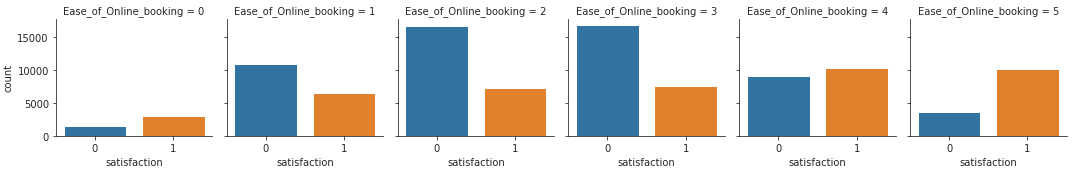

In [ ]:
# Ease_of_Online_booking
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Ease_of_Online_booking", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)

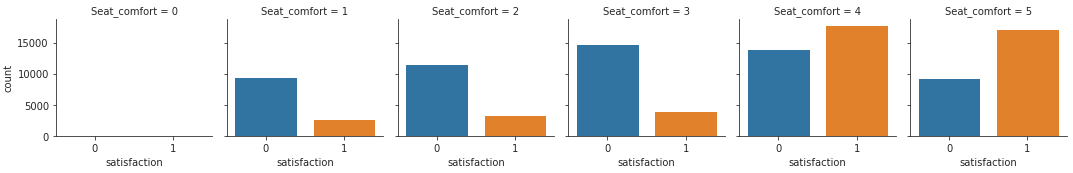

In [ ]:
# Seat_comfort
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Seat_comfort", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)

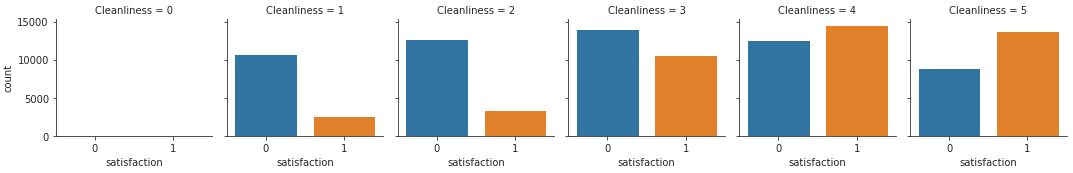

In [ ]:
# Cleanliness
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Cleanliness", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)

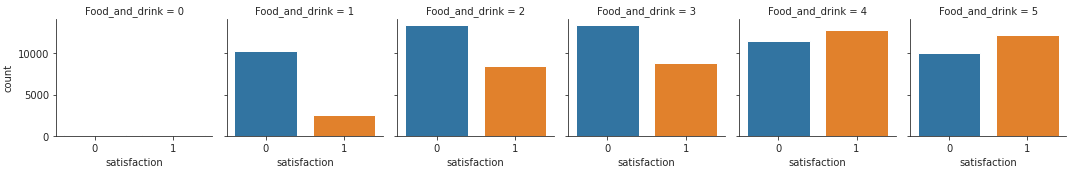

In [ ]:
# Food_and_drink
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Food_and_drink", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)

**Ease of Online Booking, Seat Comfort, Cleanliness & Food and Drink:** <br/> 
For all of these four features, maximum number of satisfied passengers belongs to the category who gave 4 and 5 rating. The passengers who gave rating below 4 are mostly neutral/dissatisfied.

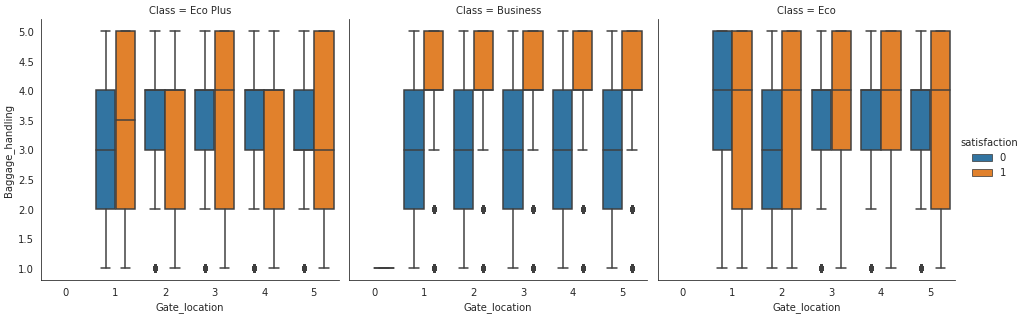

In [ ]:
# Gate_location and Baggage_handling by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Gate_location", y="Baggage_handling", hue="satisfaction", col="Class", data=train, kind="box", height=4.5, aspect=1.0)

**Gate Location and Baggage Handling grouped by Class:** <br/>
For business class passengers, it is observed that all gate locations have higher number of neutral/dissatisfied passengers when baggage handling is not upto the satisfactory level (rating <= 4). For Eco Plus class, when the gate location is 1 and for Eco class, when the gate location is 2, even when the baggages are handled in a mediocre way (rating 2 to 4), passengers remained neutral/dissatisfied.

<AxesSubplot:xlabel='Inflight_service', ylabel='satisfaction'>

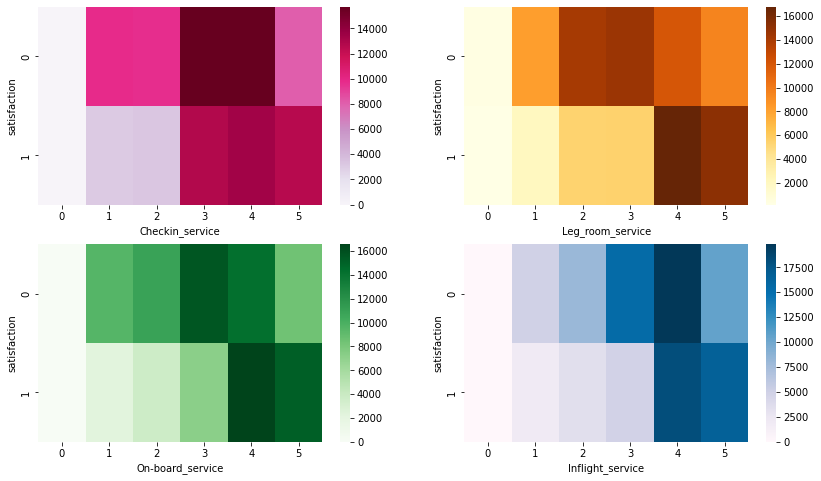

In [ ]:
# Checkin_service, Leg_room_service, On-board_service and Inflight_service

fig, axarr = plt.subplots(2, 2, figsize=(14, 8))

table1 = pd.crosstab(train['satisfaction'], train['Checkin_service'])
sns.heatmap(table1, cmap='PuRd', ax = axarr[0][0])
table2 = pd.crosstab(train['satisfaction'], train['Leg_room_service'])
sns.heatmap(table2, cmap='YlOrBr', ax = axarr[0][1])
table3 = pd.crosstab(train['satisfaction'], train['On-board_service'])
sns.heatmap(table3, cmap='Greens', ax = axarr[1][0])
table4 = pd.crosstab(train['satisfaction'], train['Inflight_service'])
sns.heatmap(table4, cmap='PuBu', ax = axarr[1][1])

**Checkin Service, Leg-room Service, On-board Service and Inflight Service:** <br/>
For checkin services, the passengers who gave 0-2 rating are majorly neutral/dissatisfied. For other three services mentioned above, only the customers or passengers who give 4 and 5 rating belong to satisfied passengers category.

### Label Encoding of Categorical Variables

In [ ]:
# For Train set
lencoders = {}
for col in train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    train[col] = lencoders[col].fit_transform(train[col])

In [ ]:
# For Test Set
lencoders_t = {}
for col in test.select_dtypes(include=['object']).columns:
    lencoders_t[col] = LabelEncoder()
    test[col] = lencoders_t[col].fit_transform(test[col])

### Detection and Removal of Outliers

In [ ]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender                                  1.0
Customer_Type                           0.0
Age                                    24.0
Type_of_Travel                          1.0
Class                                   1.0
Flight_Distance                      1329.0
Inflight_wifi_service                   2.0
Departure/Arrival_time_convenient       2.0
Ease_of_Online_booking                  2.0
Gate_location                           2.0
Food_and_drink                          2.0
Online_boarding                         2.0
Seat_comfort                            3.0
Inflight_entertainment                  2.0
On-board_service                        2.0
Leg_room_service                        2.0
Baggage_handling                        2.0
Checkin_service                         1.0
Inflight_service                        2.0
Cleanliness                             2.0
Departure_Delay_in_Minutes             12.0
Arrival_Delay_in_Minutes               13.0
satisfaction                    

In [ ]:
# Removal of outliers from dataset
train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train.shape

(61197, 23)

### Finding Correlation among Features

Correlation Heatmap

<AxesSubplot:>

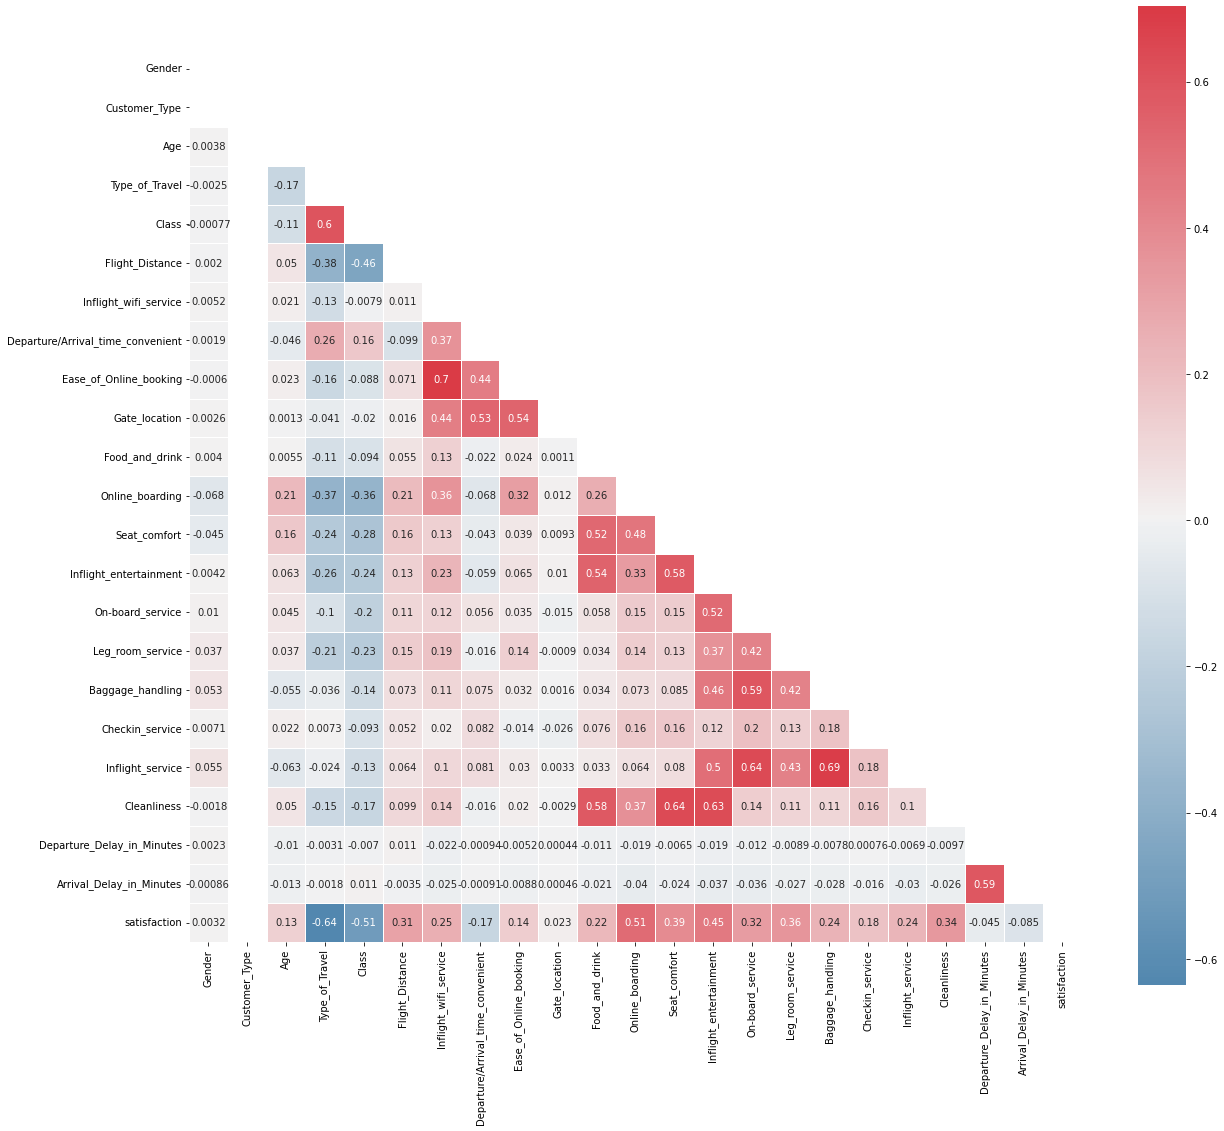

In [ ]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

"Ease_of_Online_booking" is highly correlated with "Inflight_wifi_service" and "Inflight_service" is highly correlated with "Baggage_handling". But no pair is having corrrelation coefficient exactly equal to 1. Therefore there is no perfect multi-collinearity. Hence we are not discarding any variable.

### Selection of top 10 features using Chi-Square

In [ ]:
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(train)
modified_data = pd.DataFrame(r_scaler.transform(train), columns=train.columns)
modified_data.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1.0,0.0,0.076923,1.0,1.0,0.115789,0.6,0.8,0.6,0.2,...,1.0,0.8,0.6,0.75,0.666667,1.0,1.0,0.833333,0.56250,0.0
1,0.0,0.0,0.243590,0.0,0.0,0.299865,0.4,0.4,0.4,0.4,...,1.0,0.8,0.6,0.75,0.666667,0.8,1.0,0.000000,0.00000,1.0
2,1.0,0.0,0.692308,0.0,0.0,0.049393,0.6,0.6,0.6,0.6,...,0.6,0.6,0.8,0.75,0.333333,0.6,0.6,0.000000,0.00000,1.0
3,0.0,0.0,0.243590,1.0,0.5,0.310121,0.6,0.8,0.4,0.2,...,0.2,0.6,0.8,0.75,0.666667,0.8,0.2,0.000000,0.00000,0.0
4,1.0,0.0,0.512821,1.0,0.5,0.336032,0.4,0.8,0.4,0.6,...,0.4,0.6,0.6,0.75,0.333333,1.0,0.4,0.300000,0.71875,0.0


In [ ]:
X.drop(['Departure_delay_in_minutes', ''])

In [ ]:
X = modified_data.loc[:,modified_data.columns!='satisfaction']
y = modified_data[['satisfaction']]
selector = SelectKBest(chi2, k=10)
selector.scores_

AttributeError: 'SelectKBest' object has no attribute 'scores_'

In [ ]:
X = modified_data.loc[:,modified_data.columns!='satisfaction']
y = modified_data[['satisfaction']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Type_of_Travel', 'Class', 'Flight_Distance', 'Inflight_wifi_service',
       'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
       'On-board_service', 'Leg_room_service', 'Cleanliness'],
      dtype='object')


In [ ]:
selector.scores_, selector.pvalues_

(array([3.14572812e-01,            nan, 8.60405213e+01, 1.51011191e+04,
        5.60345942e+03, 1.20856304e+03, 5.24054393e+02, 2.33836848e+02,
        1.74260843e+02, 3.68447297e+00, 3.09073599e+02, 1.62608839e+03,
        1.45109445e+03, 1.23297195e+03, 5.84952715e+02, 7.71339597e+02,
        4.74392750e+02, 4.04949542e+02, 2.52570078e+02, 6.83453448e+02,
        5.36735930e+01, 1.76611895e+02]),
 array([5.74887588e-001,             nan, 1.76286093e-020, 0.00000000e+000,
        0.00000000e+000, 8.40073945e-265, 5.55215338e-116, 8.68199090e-053,
        8.68203420e-040, 5.49213259e-002, 3.47564858e-069, 0.00000000e+000,
        0.00000000e+000, 4.16537591e-270, 3.13886282e-129, 9.19370588e-170,
        3.54718232e-105, 4.60784568e-090, 7.14744453e-057, 1.18555551e-150,
        2.36723784e-013, 2.66206782e-040]))

In [ ]:
selector.pvalues_.size

22

### Importance of feature using Wrapper Method

In [ ]:
X = train.drop('satisfaction', axis=1)
y = train['satisfaction']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

**'Type_of_Travel', 'Class', 'Inflight_wifi_service', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment'** <br/>
Only these six features are inherently important in contributing towards the customer or passenger satisfaction. Another feature importance deciding method is also used to cross check the results obtained in this method.

### Feature Permutation Importance

In [ ]:
perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

From all the above results, we can conclude the list of important features that affects the customer or passenger satisfaction.

***Most Important Features:*** <br/>
Type_of_Travel, Inflight_wifi_service, Online_boarding, Seat_comfort

***Other Important Features:*** <br/>
Class, Flight_Distance, Inflight_entertainment, On-board_service, Leg_room_service, Cleanliness, Checkin_service, Inflight_service, Baggage_handlin

### Building Models

In [ ]:
train = train.rename({'Departure/Arrival_time_convenient':'dept_arrival_conv','On-board_service':'On_board_service'},axis=1)

In [ ]:
features = ['Type_of_Travel','Inflight_wifi_service','Online_boarding','Seat_comfort','Flight_Distance',
            'Inflight_entertainment','On_board_service','Leg_room_service','Cleanliness','Checkin_service', 
            'Inflight_service', 'Baggage_handling']

tmp = '+'.join(features)
    
tmp = 'satisfaction~' + tmp

logitfit = smf.probit(formula = str(tmp), data = train).fit()
logitfit.summary()

Optimization terminated successfully.
         Current function value: 0.318013
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:           satisfaction   No. Observations:                61197
Model:                         Probit   Df Residuals:                    61184
Method:                           MLE   Df Model:                           12
Date:                Sat, 09 Apr 2022   Pseudo R-squ.:                  0.5411
Time:                        02:39:09   Log-Likelihood:                -19461.
converged:                       True   LL-Null:                       -42406.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -3.9696      0.044    -90.770      0.000      -4.055      -3.884
Type_of_Travel            -1.8157      0.017   -109.239      0.000      -1.848      -1.783
Inflight_wifi_service      0.0770      0.006     13.087      0.000       0.065       0.089
Online_boarding            0.3057      0.007     45.558      0.000       0.293       0.319
Seat_comfort               0.0874      0.008     10.830      0.000       0.072       0.103
Flight_Distance         6.459e-05   7.98e-06      8.093      0.000    4.89e-05    8.02e-05
Inflight_entertainment     0.0267      0.010      2.710      0.007       0.007       0.046
On_board_service           0.1788      0.008     22.717      0.000       0.163       0.194
Leg_room_service           0.1822      0.006     29.222      0.000       0.170       0.194
Cleanliness                0.1627      0.008     19.784      0.000       0.147       0.179
Checkin_service            0.2046      0.008     26.657      0.000       0.190       0.220
Inflight_service           0.0499      0.009      5.305      0.000       0.031       0.068
Baggage_handling           0.0717      0.009      8.390      0.000       0.055       0.089
==========================================================================================
"""

In [ ]:
features1 = ['Inflight_wifi_service','Online_boarding','Seat_comfort','Flight_Distance',
            'Inflight_entertainment','On_board_service','Leg_room_service','Cleanliness','Checkin_service', 
            'Inflight_service', 'Baggage_handling']



features2 = ['Inflight_wifi_service','Seat_comfort','On_board_service','Leg_room_service','Cleanliness','Checkin_service', 
            'Inflight_service']

features = [x for x in features1 if x not in features2]

features = ['Type_of_Travel','Inflight_wifi_service','Online_boarding','Flight_Distance','On_board_service','Leg_room_service','Cleanliness','Checkin_service', 'Baggage_handling']


tmp = '+'.join(features)
    
tmp = 'satisfaction~' + tmp

logitfit = smf.probit(formula = str(tmp), data = train).fit()
logitfit.summary()

Optimization terminated successfully.
         Current function value: 0.319648
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:           satisfaction   No. Observations:                61197
Model:                         Probit   Df Residuals:                    61187
Method:                           MLE   Df Model:                            9
Date:                Sat, 09 Apr 2022   Pseudo R-squ.:                  0.5387
Time:                        02:55:21   Log-Likelihood:                -19561.
converged:                       True   LL-Null:                       -42406.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -3.8710      0.042    -92.029      0.000      -3.953      -3.789
Type_of_Travel           -1.8311      0.016   -113.211      0.000      -1.863      -1.799
Inflight_wifi_service     0.0750      0.006     13.041      0.000       0.064       0.086
Online_boarding           0.3262      0.006     50.932      0.000       0.314       0.339
Flight_Distance        6.529e-05   7.94e-06      8.222      0.000    4.97e-05    8.09e-05
On_board_service          0.2052      0.007     29.086      0.000       0.191       0.219
Leg_room_service          0.1902      0.006     30.869      0.000       0.178       0.202
Cleanliness               0.2230      0.006     36.946      0.000       0.211       0.235
Checkin_service           0.2077      0.008     27.431      0.000       0.193       0.223
Baggage_handling          0.0979      0.008     13.002      0.000       0.083       0.113
=========================================================================================
"""

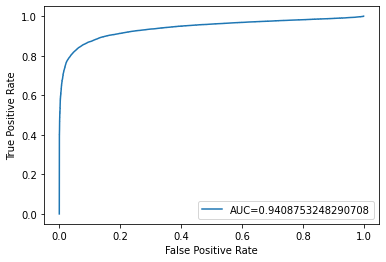

In [ ]:
X = train.drop(['satisfaction'], axis=1)
y_pred_proba = logitfit.predict(X)
y_test = train[['satisfaction']]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
threshold=0.7


predicted_class1=np.zeros(y_pred_proba.shape)
predicted_class1[y_pred_proba>threshold]=1
predicted_class1

conf_matrix = metrics.confusion_matrix(y_test, predicted_class1)

In [ ]:
print(metrics.classification_report(y_test, predicted_class1))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89     29991
           1       0.95      0.81      0.88     31206

    accuracy                           0.88     61197
   macro avg       0.89      0.88      0.88     61197
weighted avg       0.89      0.88      0.88     61197



#### Logistic Regression

In [ ]:
# Logistic Regression penalized with Elastic Net (L1 penalty = 50%, L2 penalty = 50%)

params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

In [ ]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

It can be seen that among the 12 features, except 6th feature (Inflight_entertainment), rest 11 features have p-value < 0.05. So these are really important features impacting highly towards the target variable (passenger satisfaction). <br/>
A pseudo R-square value (McFadden's Pseudo R-Squared Value) of 0.55 represents an excellent fit.

#### Naive Bayes Classifier

[02:17:56] WARNING: /private/var/folders/c5/q5hwm6jd4hs70s9m2_j4g5n40000gn/T/pip-install-stir94cn/xgboost_1e5889e28e0d4ce0b2f807498dbf44ad/build/temp.macosx-11-arm64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:18:02] WARNING: /private/var/folders/c5/q5hwm6jd4hs70s9m2_j4g5n40000gn/T/pip-install-stir94cn/xgboost_1e5889e28e0d4ce0b2f807498dbf44ad/build/temp.macosx-11-arm64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


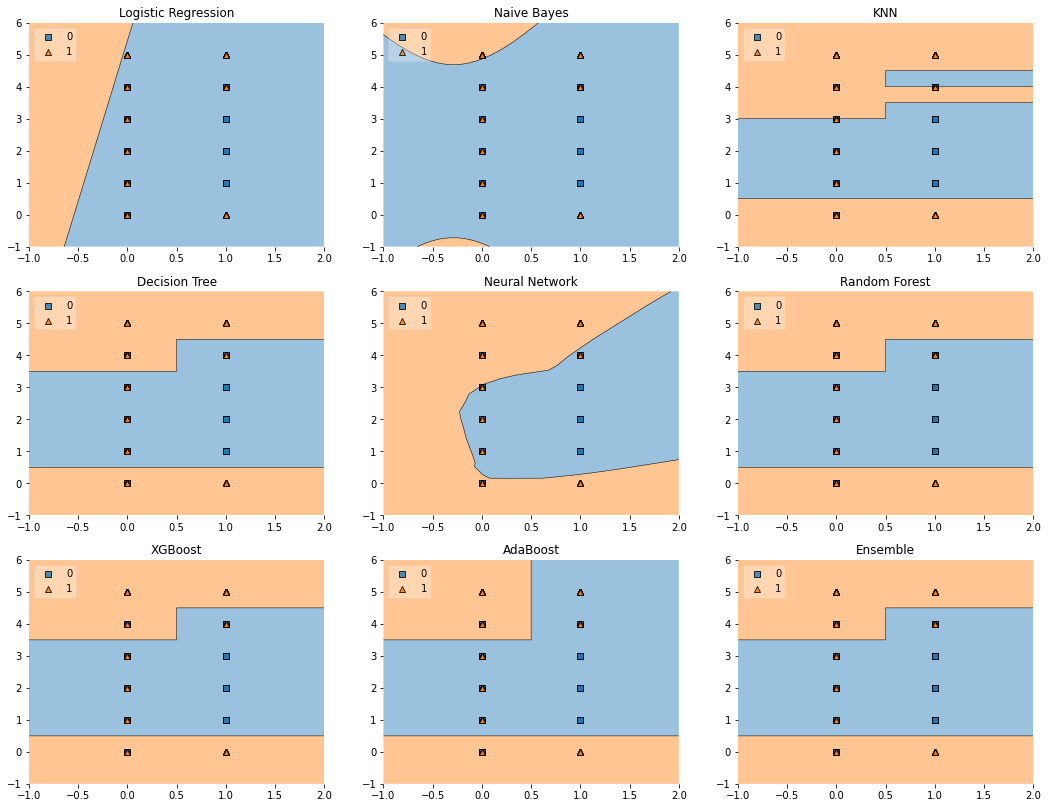

In [ ]:
value = 1.70
width = 0.85

clf1 = LogisticRegression(random_state=12345)
clf2 = GaussianNB()
clf3 = KNeighborsClassifier()
clf4 = DecisionTreeClassifier(random_state=12345) 
clf5 = MLPClassifier(random_state=12345, verbose = 0)
clf6 = RandomForestClassifier(random_state=12345)
clf7 = xgb.XGBClassifier(random_state=12345)
clf8 = AdaBoostClassifier(random_state=12345)
eclf = EnsembleVoteClassifier(clfs=[clf6, clf7, clf8], weights=[1, 1, 1], voting='soft')

# Considering only the most important features
X_list = train[["Type_of_Travel", "Inflight_wifi_service", "Online_boarding", "Seat_comfort"]]
X = np.asarray(X_list, dtype=np.float32)
y_list = train["satisfaction"]
y = np.asarray(y_list, dtype=np.int32)

# Decision Regions Plotting
gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(18, 14))

labels = ['Logistic Regression',
          'Naive Bayes',
          'KNN',
          'Decision Tree',
          'Neural Network',
          'Random Forest',
          'XGBoost',
          'AdaBoost',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, eclf],
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, 
                                filler_feature_values={2: value, 3: value}, 
                                filler_feature_ranges={2: width, 3: width}, 
                                legend=2)
    plt.title(lab)

plt.show()

### Model Comparison

Compare the performances of the above discussed models with respect to their ROC_AUC score and total time taken for execution.

In [ ]:
roc_auc_scores = [roc_auc_lr, roc_auc_nb, roc_auc_kn, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_xgb, roc_auc_adab]
tt = [tt_lr, tt_nb, tt_kn, tt_dt, tt_nn, tt_rf, tt_xgb, tt_adab]

model_data = {'Model': ['Logistic Regression','Naive Bayes','K-NN','Decision Tree','Neural Network','Random Forest','XGBoost','AdaBoost'],
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('Model Comparison: Area under ROC Curve and Time taken for execution by Various Models', fontsize=14)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=14)
ax1.set_ylabel('Time taken', fontsize=14, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='GnBu_r')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('ROC_AUC', fontsize=14, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

In [ ]:
train.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service', 'dept_arrival_conv',
       'Ease_of_Online_booking', 'Gate_location', 'Food_and_drink',
       'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
       'On_board_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Inflight_service', 'Cleanliness',
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
features = ['Type_of_Travel','Inflight_wifi_service','Online_boarding','Seat_comfort','Flight_Distance',
            'Inflight_entertainment','On_board_service','Leg_room_service','Cleanliness','Checkin_service', 
            'Inflight_service', 'Baggage_handling']

In [ ]:
len(features)

12